<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/Project/industrial-ai-project/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install imbalanced-learn catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

warnings.filterwarnings('ignore')

In [5]:
raw_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

raw_data = raw_data.drop(['id'],axis=1)
test_data = test_data.drop(['id'],axis=1)

id: This column likely represents a unique identifier for each patient or observation in the dataset.

N_Days: This column represents the number of days for which the data was collected or observed for each patient.

Drug: This column likely represents the type of drug or treatment that the patient was given.

Age: This column represents the age of the patient.

Sex: This column represents the sex of the patient,
typically coded as 0 for female and 1 for male.

Ascites: This column represents the presence or absence of ascites, which is the accumulation of fluid in the abdominal cavity. It is likely coded as 0 for absent and 1 for present.

Hepatomegaly: This column represents the presence or absence of hepatomegaly, which is the enlargement of the liver. It is likely coded as 0 for absent and 1 for present.

Spiders: This column represents the presence or absence of spider angiomas, which are small blood vessels that appear on the skin. It is likely coded as 0 for absent and 1 for present.

Edema: This column represents the presence or absence of edema, which is the swelling of tissues due to the accumulation of fluid. It is likely coded as 0 for absent and 1 for present.

Bilirubin: This column represents the level of bilirubin in the patient's blood, which is a measure of liver function.

Cholesterol: This column represents the level of cholesterol in the patient's blood.

Albumin: This column represents the level of albumin in the patient's blood, which is a measure of liver function.

Copper: This column represents the level of copper in the patient's blood.

Alk_Phos: This column represents the level of alkaline phosphatase in the patient's blood, which is a measure of liver function.

SGOT: This column represents the level of serum glutamic-oxaloacetic transaminase in the patient's blood, which is a measure of liver function.

Tryglicerides: This column represents the level of triglycerides in the patient's blood.

Platelets: This column represents the number of platelets in the patient's blood.

Prothrombin: This column represents the prothrombin time, which is a measure of the time it takes for the blood to clot.

Stage: This column likely represents the stage or severity of the patient's liver disease.

Status: This column likely represents the outcome or status of the patient, such as alive or dead.


In [6]:
numerical_cols = raw_data.select_dtypes(include=['number']).columns
categorical_cols = raw_data.select_dtypes(exclude=['number']).columns

numerical_cols , categorical_cols

(Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
        'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
        'Stage'],
       dtype='object'),
 Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object'))

In [ ]:
print(raw_data.shape)
raw_data.isnull().sum()

(15000, 19)


,0
N_Days,0
Drug,6551
Age,0
Sex,0
Ascites,6541
Hepatomegaly,6550
Spiders,6553
Edema,0
Bilirubin,0
Cholesterol,8337


In [ ]:
print(test_data.shape)
test_data.isnull().sum()

(10000, 18)


,0
N_Days,0
Drug,4284
Age,0
Sex,0
Ascites,4282
Hepatomegaly,4287
Spiders,4289
Edema,0
Bilirubin,0
Cholesterol,5547


Status is missing in the output . hidden

In [ ]:
raw_data.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6663.000000,15000.000000,8360.000000,8445.000000,8444.000000,6615.000000,14423.000000,14982.000000,15000.000000
mean,7499.500000,1960.824867,19293.976400,1.877947,327.944034,3.523881,75.660299,1682.848147,107.009773,109.772789,254.426465,10.620505,3.031533
std,4330.271354,1288.185417,3653.413132,2.744575,177.842672,0.372401,76.446063,1860.896133,50.983101,47.979168,104.762092,0.732634,0.878895
min,0.000000,20.000000,26.000000,0.300000,120.000000,2.000000,1.000000,7.000000,12.000000,33.000000,0.300000,9.000000,1.000000
25%,3749.750000,1094.250000,16467.000000,0.600000,242.000000,3.290000,31.000000,728.000000,71.000000,80.000000,182.000000,10.100000,2.000000
50%,7499.500000,1776.000000,19577.000000,0.900000,282.000000,3.580000,52.000000,1083.000000,97.650000,99.000000,249.000000,10.600000,3.000000
75%,11249.250000,2635.000000,22388.000000,1.800000,361.000000,3.770000,88.000000,1716.000000,133.300000,133.000000,312.000000,11.000000,4.000000
max,14999.000000,25594.000000,40392.000000,28.000000,2468.000000,4.640000,1588.000000,24101.200000,601.350000,598.000000,4214.000000,18.000000,4.000000


In [ ]:
# finding unique values in each columns
def unique_values(df):
    for cols in df.columns:
        print(cols,':',df[cols].nunique())

print(unique_values(raw_data))
print('--------------------')
print(unique_values(test_data))


N_Days : 552
Drug : 3
Age : 384
Sex : 2
Ascites : 2
Hepatomegaly : 2
Spiders : 2
Edema : 3
Bilirubin : 116
Cholesterol : 212
Albumin : 164
Copper : 175
Alk_Phos : 382
SGOT : 202
Tryglicerides : 153
Platelets : 262
Prothrombin : 50
Stage : 4
Status : 3
None
--------------------
N_Days : 510
Drug : 2
Age : 374
Sex : 2
Ascites : 2
Hepatomegaly : 2
Spiders : 2
Edema : 3
Bilirubin : 115
Cholesterol : 208
Albumin : 164
Copper : 165
Alk_Phos : 350
SGOT : 195
Tryglicerides : 152
Platelets : 255
Prothrombin : 52
Stage : 4
None


Pre-processing data

In [ ]:
processable_data = raw_data.copy(deep=True)
print(processable_data.shape)

td_copy = test_data.copy(deep = True)
print(td_copy.shape)

(15000, 19)
(10000, 18)


In [ ]:
columns_to_binary_encode = ['Ascites', 'Hepatomegaly', 'Spiders','Edema']

# Perform binary encoding
for column in columns_to_binary_encode:
    # Create a new column with binary values (0 or 1)
    processable_data[column] = processable_data[column].map({'N': 0, 'Y': 1, np.nan: -1 , 'S':2})
    td_copy[column] = td_copy[column].map({'N': 0, 'Y': 1, np.nan: -1 , 'S':2})

    # Optionally, drop the original categorical column
    # processable_data.drop(column, axis=1, inplace=True)

In [ ]:
processable_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1702.0,Placebo,18806.0,F,0,0,0,0,0.6,310.0,3.85,58.0,4332.0,43.40,112.0,273.0,10.6,3.0,C
1,1,2157.0,Placebo,22646.0,F,0,1,0,0,0.8,255.0,4.14,15.0,1758.0,106.95,172.0,514.0,10.0,3.0,C
2,2,1831.0,D-penicillamine,20483.0,F,0,0,0,0,0.8,256.0,3.85,20.0,646.0,57.00,84.0,204.0,9.9,3.0,C
3,3,971.0,NaN,22646.0,F,-1,-1,-1,0,3.0,NaN,3.03,NaN,NaN,NaN,NaN,258.0,11.8,4.0,D
4,4,1368.0,NaN,21915.0,F,-1,-1,-1,0,0.8,NaN,3.94,NaN,NaN,NaN,NaN,402.0,10.5,4.0,C


In [ ]:
td_copy.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2844.0,NaN,19724.0,F,-1,-1,-1,0,0.9,NaN,3.24,NaN,NaN,NaN,NaN,330.0,10.5,3.0
1,2504.0,D-penicillamine,23612.0,M,0,0,0,0,0.6,217.0,3.87,20.0,666.0,54.25,68.0,270.0,11.2,4.0
2,1072.0,NaN,14245.0,F,-1,-1,-1,0,1.0,NaN,3.01,NaN,NaN,NaN,NaN,244.0,10.5,2.0
3,1725.0,NaN,12053.0,F,-1,-1,-1,0,2.2,NaN,3.76,NaN,NaN,NaN,NaN,418.0,9.9,3.0
4,130.0,Placebo,20535.0,F,0,1,0,0,1.3,NaN,3.82,58.0,601.0,60.45,NaN,265.0,11.5,4.0


In [ ]:
# CHECKING FOR UNIQUE VALUES
unique_values(processable_data)

id : 15000
N_Days : 552
Drug : 3
Age : 384
Sex : 2
Ascites : 3
Hepatomegaly : 3
Spiders : 3
Edema : 3
Bilirubin : 116
Cholesterol : 212
Albumin : 164
Copper : 175
Alk_Phos : 382
SGOT : 202
Tryglicerides : 153
Platelets : 262
Prothrombin : 50
Stage : 4
Status : 3


In [ ]:
# performing imputations

# Columns to mean impute
columns_to_impute = ['Bilirubin', 'Cholesterol', 'Albumin', 'SGOT', 'Platelets']

# Calculate the mean for each column
for column in columns_to_impute:
    mean_value = processable_data[column].mode()

    # Impute missing values with the mean
    processable_data[column] = processable_data[column].fillna(mean_value)
    td_copy[column] = td_copy[column].fillna(mean_value)


In [ ]:
processable_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1702.0,Placebo,18806.0,F,0,0,0,0,0.6,310.0,3.85,58.0,4332.0,43.40,112.0,273.0,10.6,3.0,C
1,1,2157.0,Placebo,22646.0,F,0,1,0,0,0.8,255.0,4.14,15.0,1758.0,106.95,172.0,514.0,10.0,3.0,C
2,2,1831.0,D-penicillamine,20483.0,F,0,0,0,0,0.8,256.0,3.85,20.0,646.0,57.00,84.0,204.0,9.9,3.0,C
3,3,971.0,NaN,22646.0,F,-1,-1,-1,0,3.0,NaN,3.03,NaN,NaN,NaN,NaN,258.0,11.8,4.0,D
4,4,1368.0,NaN,21915.0,F,-1,-1,-1,0,0.8,NaN,3.94,NaN,NaN,NaN,NaN,402.0,10.5,4.0,C


In [ ]:
# doing KNN imputation for numerical columns

# Create KNN imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Perform imputation on numerical columns
processable_data[numerical_cols] = imputer.fit_transform(processable_data[numerical_cols])
td_copy[numerical_cols] = imputer.transform(td_copy[numerical_cols])

# Encode 'Sex' column
processable_data['Sex'] = processable_data['Sex'].map({'M': 0, 'F': 1})
td_copy['Sex'] = td_copy['Sex'].map({'M': 0, 'F': 1})

# Encode 'Drug'
processable_data['Drug'] = processable_data['Drug'].astype('category').cat.codes   # this assigns unique numerical code to each distinct category
td_copy['Drug'] = td_copy['Drug'].astype('category').cat.codes

# Encode 'Status'
processable_data['Status'] = processable_data['Status'].map({'C': 0, 'D': 1, 'CL': 2})

In [ ]:
processable_data.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,1702.0,2,18806.0,1,0,0,0,0,0.6,310.0,3.85,58.0,4332.0,43.40,112.0,273.0,10.6,3.0,0
1,2157.0,2,22646.0,1,0,1,0,0,0.8,255.0,4.14,15.0,1758.0,106.95,172.0,514.0,10.0,3.0,0
2,1831.0,0,20483.0,1,0,0,0,0,0.8,256.0,3.85,20.0,646.0,57.00,84.0,204.0,9.9,3.0,0
3,971.0,-1,22646.0,1,-1,-1,-1,0,3.0,293.8,3.03,144.0,1355.6,121.83,100.6,258.0,11.8,4.0,1
4,1368.0,-1,21915.0,1,-1,-1,-1,0,0.8,363.4,3.94,61.2,1042.0,116.87,94.4,402.0,10.5,4.0,0


In [ ]:
unique_values(processable_data)

N_Days : 552
Drug : 4
Age : 384
Sex : 2
Ascites : 3
Hepatomegaly : 3
Spiders : 3
Edema : 3
Bilirubin : 116
Cholesterol : 1697
Albumin : 164
Copper : 1003
Alk_Phos : 4790
SGOT : 4025
Tryglicerides : 664
Platelets : 627
Prothrombin : 63
Stage : 4
Status : 3


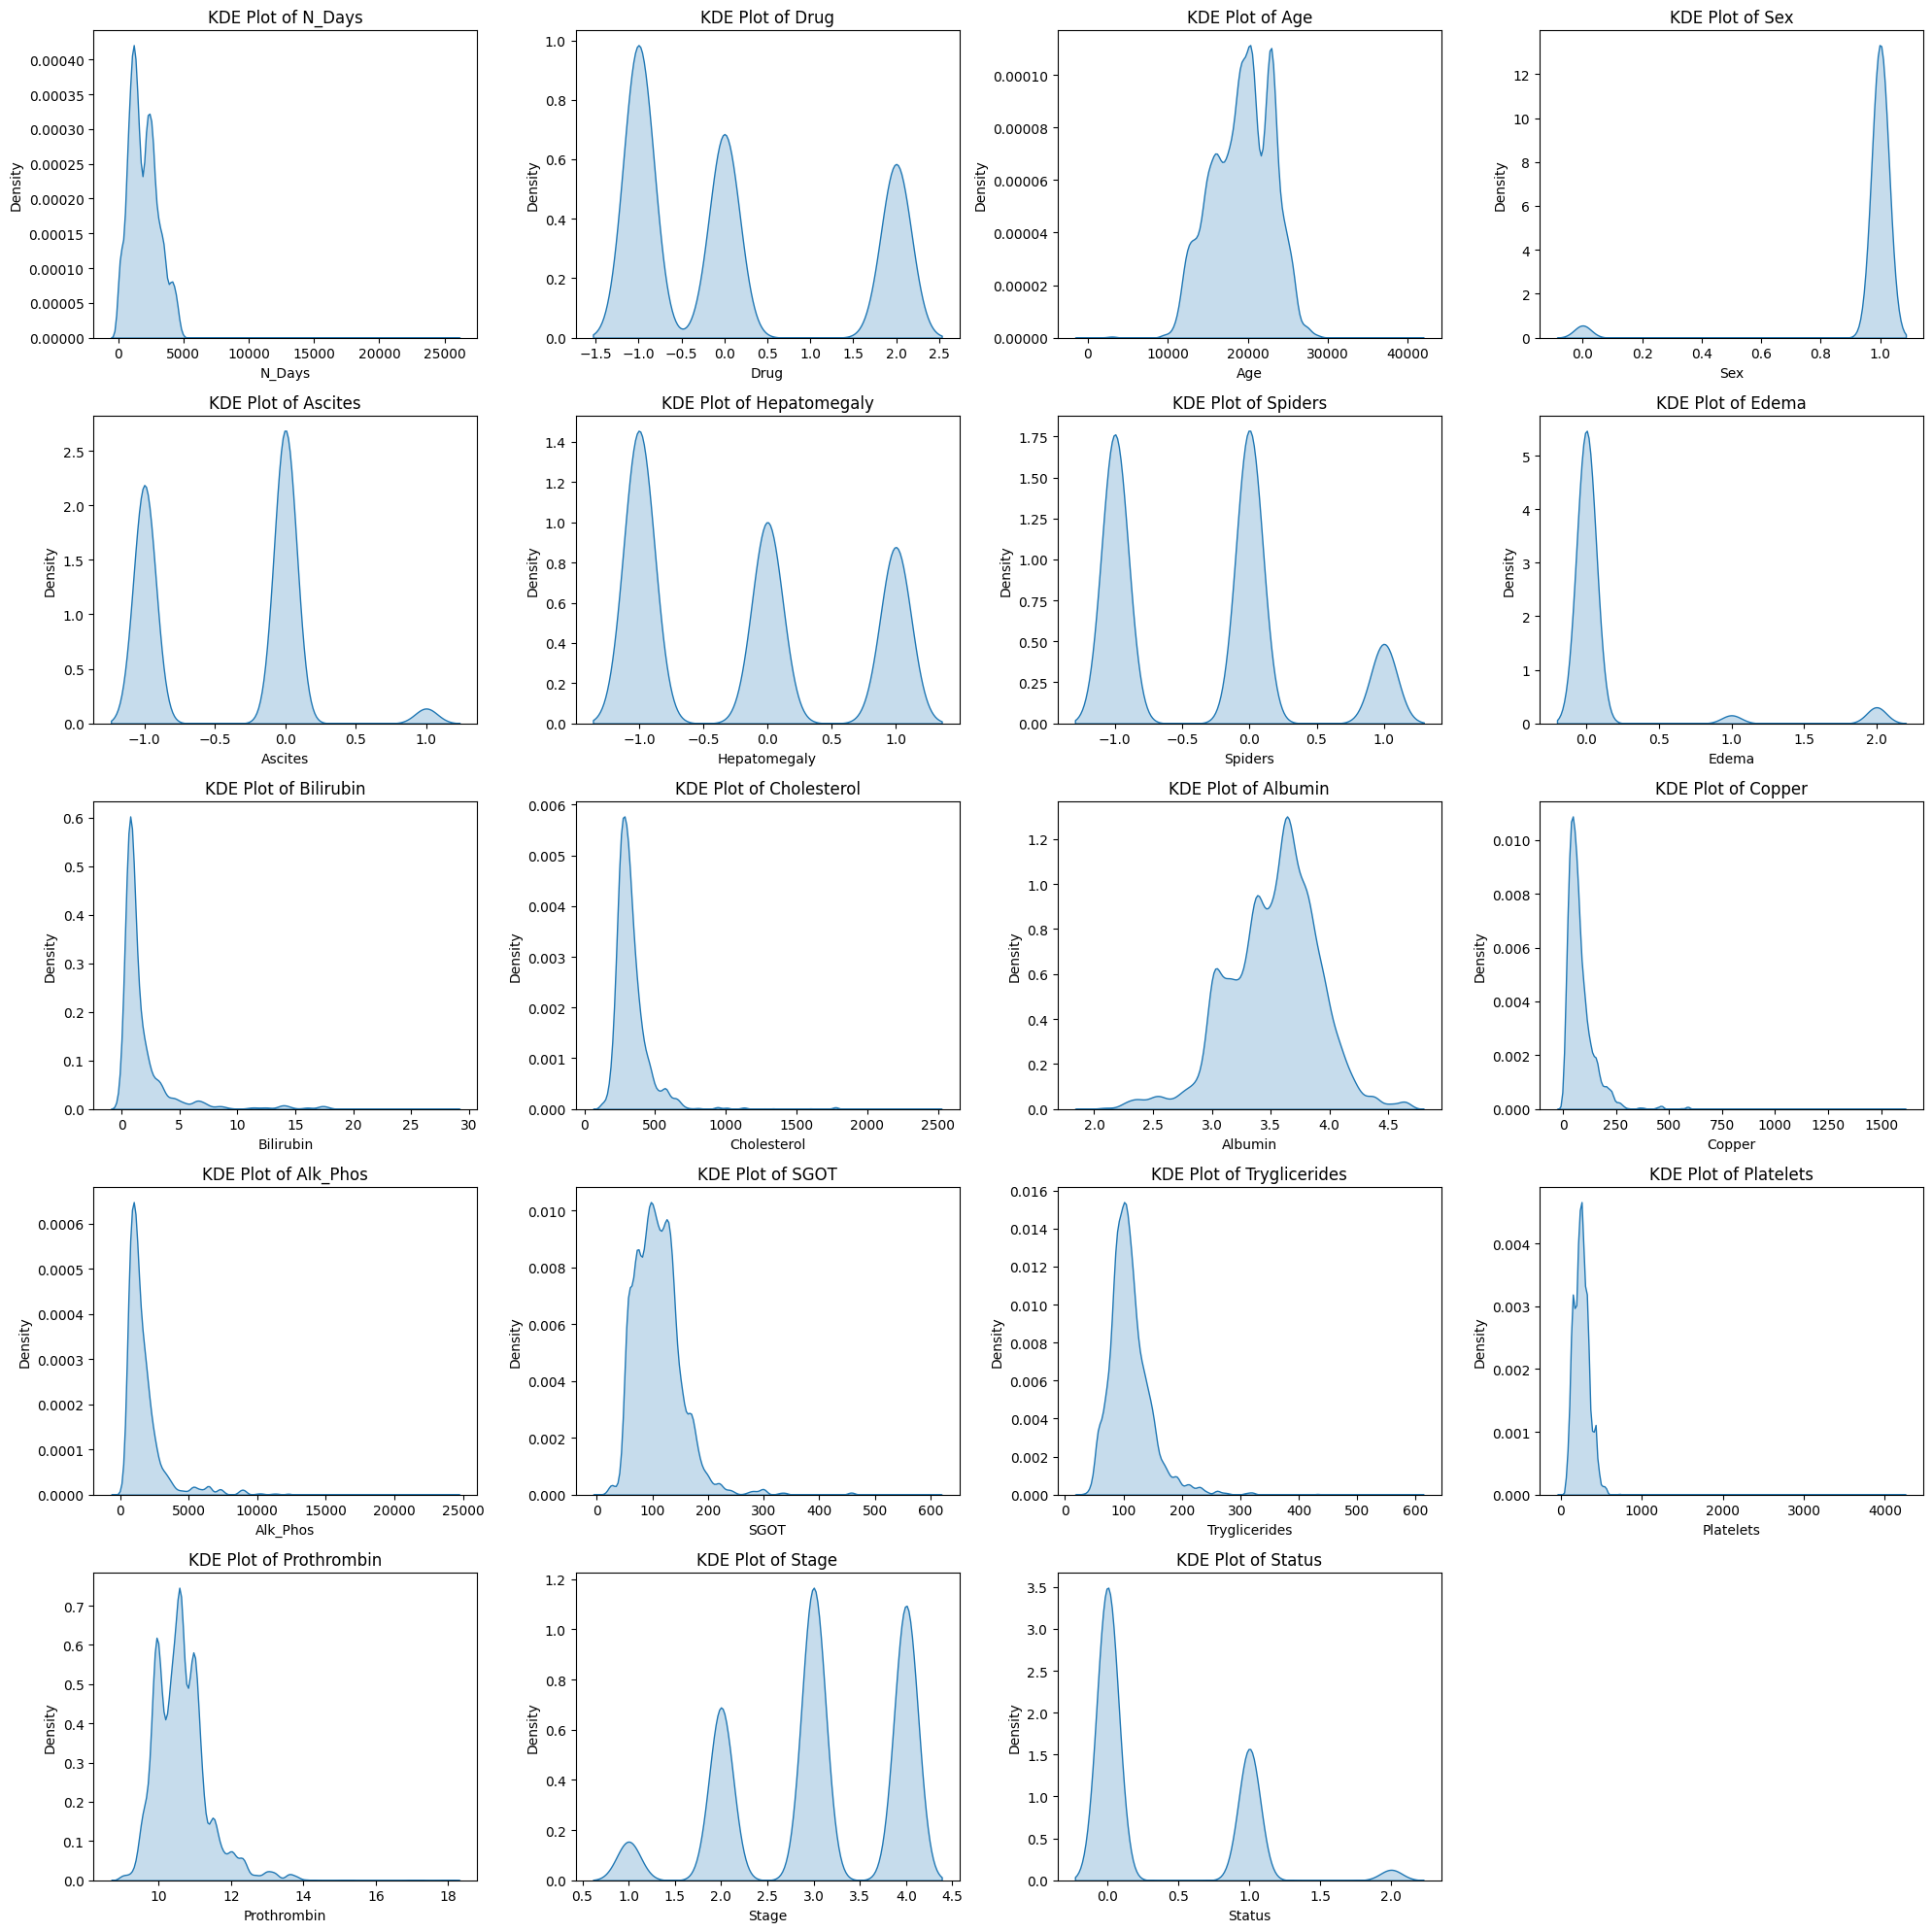

In [ ]:
# prompt: can you loop over the cols and create the kde plot for each . create a subplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'processable_data' is your DataFrame and numerical_cols are defined
plt.figure(figsize=(20, 20))

for i, col in enumerate(processable_data.columns):
    plt.subplot(5, 4, i + 1)  # Adjust subplot grid as needed
    sns.kdeplot(processable_data[col], shade=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
X = processable_data.drop('Status',axis=1)
y = processable_data['Status']

In [ ]:
X.shape , y.shape

((15000, 18), (15000,))

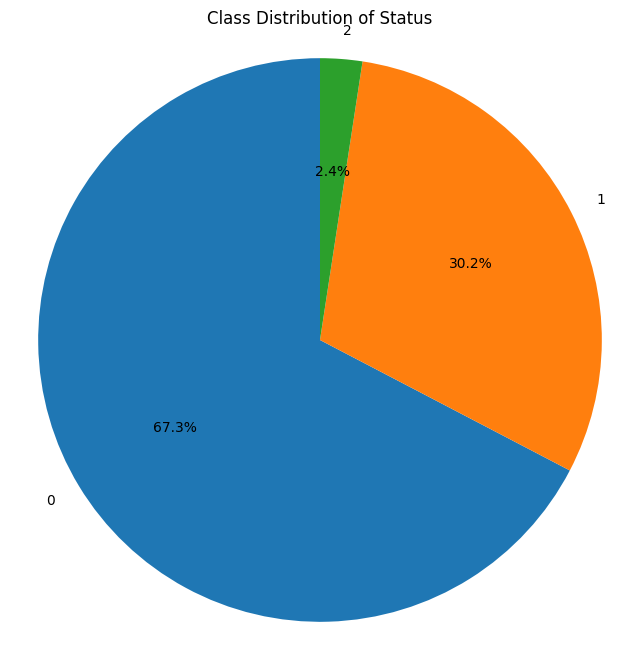

In [ ]:
# prompt: can  you check for class imbalances in processable data using piechart . target is Status

import matplotlib.pyplot as plt
# Count occurrences of each class in the 'Status' column
status_counts = processable_data['Status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution of Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:

scaler = StandardScaler()

# Fit and transform the numerical features in the training data
processable_data[numerical_cols] = scaler.fit_transform(processable_data[numerical_cols])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X and y are defined as in your previous code
X = processable_data.drop('Status', axis=1)
y = processable_data['Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1)  # You can experiment with different kernels and C values
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Doing stacking with 3 parameters to determine the efficiency

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cat = CatBoostClassifier(verbose=0, random_state=42)
rf = RandomForestClassifier(random_state=42)


In [ ]:
# Define the estimators for stacking
estimators = [
    ('xgb', xgb),
    ('cat', cat),
    ('rf', rf)
]

# Initialize the StackingClassifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the stacking model
print("Stacking Classifier:")
print(classification_report(y_test, y_pred_stacking))
print(confusion_matrix(y_test, y_pred_stacking))
